# 🧬 Single-Cell RNA-seq Analysis with Scanpy

This notebook walks through a **complete single-cell RNA-seq (scRNA-seq)** data analysis pipeline using the Python package **Scanpy**.  
It is written for **beginners** in single-cell bioinformatics — especially those coming from a biology background.

We'll go step-by-step through:
1. Loading and preprocessing data  
2. Quality control (QC)  
3. Normalization and feature selection  
4. Dimensionality reduction (PCA, UMAP)  
5. Clustering  
6. Marker gene detection and visualization

By the end of this notebook, you’ll understand not only *how* to perform each step, but also *why* it’s important.

---


### Installation

In [ ]:
!pip install scanpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.3/169.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.0/80.0 kB 3.9 MB/s eta 0:00:00


In [ ]:
!pip install anndata

In [ ]:
!pip3 install igraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 39.6 MB/s eta 0:00:00


In [ ]:
!pip install celltypist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.1 MB/s eta 0:00:00


In [ ]:
!pip install decoupler

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.0/118.0 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.5 MB/s eta 0:00:00
  Created wheel for docrep: filename=docrep-0.3.2-py3-none-any.whl size=19876 sha256=2126261fe16cbe1f89506f19021566883bae6fdae763cd2f5a861013f645ad80
  Stored in directory: /root/.cache/pip/wheels/d6/19/ee/0a6a1793d91c449563b49ccab57ce52da3e6fab7614836bd8c
Successfully built docrep
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.2
    Uninstalling scipy-1.16.2:
      Successfully uninstalled scipy-1.16.2


In [ ]:
!pip install fa2-modified

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 6.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for fa2-modified: filename=fa2_modified-0.3.10-cp312-cp312-linux_x86_64.whl size=493566 sha256=a69ec6fb4fb2f5bb2781f699e765b0b0c65d9095abb4de6ef732f7f7d91a014c
  Stored in directory: /root/.cache/pip/wheels/e7/b5/c2/e87afecc23dc78723045cde9a733677ee2b3c1374a7ed3a5e8
Successfully built fa2-modified


### 🧩 Loading Data
In this step, we load the single-cell expression matrix into an **AnnData** object — the core data structure in Scanpy.
It contains:
- `adata.X`: the expression matrix (cells × genes)
- `adata.obs`: metadata for each cell
- `adata.var`: metadata for each gene


In [ ]:
#Import core single cell tools

import scanpy as sc
import anndata as ad

/usr/local/lib/python3.12/dist-packages/scanpy/_utils/__init__.py:33: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
  from anndata import __version__ as anndata_version
/usr/local/lib/python3.12/dist-packages/scanpy/__init__.py:24: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
  if Version(anndata.__version__) >= Version("0.11.0rc2"):
/usr/local/lib/python3.12/dist-packages/scanpy/readwrite.py:16: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
  if Version(anndata.__version__) >= Version("0.11.0rc2"):


In [ ]:
!wget https://cf.10xgenomics.com/samples/cell-vdj/8.0.1/10k_5p_Human_diseased_PBMC_ALL_Fresh/10k_5p_Human_diseased_PBMC_ALL_Fresh_count_filtered_feature_bc_matrix.h5

--2025-10-20 13:25:00--  https://cf.10xgenomics.com/samples/cell-vdj/8.0.1/10k_5p_Human_diseased_PBMC_ALL_Fresh/10k_5p_Human_diseased_PBMC_ALL_Fresh_count_filtered_feature_bc_matrix.h5
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 104.18.0.173, 104.18.1.173, 2606:4700::6812:1ad, ...
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|104.18.0.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65402953 (62M) [application/x-hdf5]
Saving to: ‘10k_5p_Human_diseased_PBMC_ALL_Fresh_count_filtered_feature_bc_matrix.h5’

10k_5p_Human_diseas 100%[===================>]  62.37M  37.2MB/s    in 1.7s    

2025-10-20 13:25:02 (37.2 MB/s) - ‘10k_5p_Human_diseased_PBMC_ALL_Fresh_count_filtered_feature_bc_matrix.h5’ saved [65402953/65402953]



In [ ]:
fresh_blood_adata = sc.read_10x_h5('10k_5p_Human_diseased_PBMC_ALL_Fresh_count_filtered_feature_bc_matrix.h5')

/usr/local/lib/python3.12/dist-packages/anndata/_core/anndata.py:1794: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.12/dist-packages/anndata/_core/anndata.py:1794: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [ ]:
print(fresh_blood_adata)

AnnData object with n_obs × n_vars = 13853 × 38606
    var: 'gene_ids', 'feature_types', 'genome'


In [ ]:
# the dimensions of our dataset
fresh_blood_adata.shape

(13439, 9650)

In [ ]:
#13853 cells
#38606 genes

In [ ]:
# let's look at the first 5 rows describing the genes in our dataset
fresh_blood_adata.var.head()

,gene_ids,feature_types,genome
DDX11L2,ENSG00000290825,Gene Expression,GRCh38
MIR1302-2HG,ENSG00000243485,Gene Expression,GRCh38
FAM138A,ENSG00000237613,Gene Expression,GRCh38
ENSG00000290826,ENSG00000290826,Gene Expression,GRCh38
OR4F5,ENSG00000186092,Gene Expression,GRCh38


In [ ]:
# let's look at the first 5 rows describing the cells (ID) in our dataset
fresh_blood_adata.obs.head()

""
AAACCAAAGAACAGAC-1
AAACCAAAGCAAGATA-1
AAACCAAAGCTGGTTA-1
AAACCAGCACCTAACG-1
AAACCAGCACGCGTTA-1


In [ ]:
# How about both. in a proper dataframe format

fresh_blood_adata.to_df()

,DDX11L2,MIR1302-2HG,FAM138A,ENSG00000290826,OR4F5,ENSG00000238009,ENSG00000239945,ENSG00000239906,ENSG00000241860,ENSG00000241599,...,ENSG00000275249,ENSG00000274792,ENSG00000274175,ENSG00000275869,ENSG00000273554,ENSG00000277836,ENSG00000278633,ENSG00000276017,ENSG00000278817,ENSG00000277196
AAACCAAAGAACAGAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCAAAGCAAGATA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCAAAGCTGGTTA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCAGCACCTAACG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCAGCACGCGTTA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTTGTCTTCGTCCATT-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GTTGTGCAGAAGCCGA-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GTTGTGCAGATTACAC-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GTTGTGGGTAATGGGA-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 🧹 Quality Control (QC)
QC ensures we only keep high-quality cells and informative genes.
Typical filters remove:
- Harmonize unique gene names (avoid gene duplications from old pipelines)
- Cells with too few genes (likely dead)
- Cells with too many genes (possible doublets)
- Genes expressed in very few cells (uninformative)


In [ ]:
# A useful step for older datasets
fresh_blood_adata.var_names_make_unique()
fresh_blood_adata.obs_names_make_unique()

In [ ]:
#Let's search for possible contamination from dying cells, ribosomal transcripts or hemoglobin

#Cells with a high proportion of mitochondrial reads (say >10–20%) are likely stressed, apoptotic, or poorly captured
#Ribosomal transcripts are removed because they represent global transcriptional activity, not cell-type-specific biology
#Instead of true cell populations, high HB signal often represents ambient RNA contamination from lysed red blood cells

fresh_blood_adata.var['MT'] = fresh_blood_adata.var_names.str.startswith("MT-")
fresh_blood_adata.var['RIBO'] = fresh_blood_adata.var_names.str.startswith("RPS", "RPL")
fresh_blood_adata.var['HB'] = fresh_blood_adata.var_names.str.startswith("^HB[^(P)]")

In [ ]:
#let's just take a quick look at one of them.

mt_genes = fresh_blood_adata.var[fresh_blood_adata.var['MT']]
mt_genes

,gene_ids,feature_types,genome,MT,RIBO,HB
MT-ND1,ENSG00000198888,Gene Expression,GRCh38,True,False,False
MT-ND2,ENSG00000198763,Gene Expression,GRCh38,True,False,False
MT-CO1,ENSG00000198804,Gene Expression,GRCh38,True,False,False
MT-CO2,ENSG00000198712,Gene Expression,GRCh38,True,False,False
MT-ATP8,ENSG00000228253,Gene Expression,GRCh38,True,False,False
MT-ATP6,ENSG00000198899,Gene Expression,GRCh38,True,False,False
MT-CO3,ENSG00000198938,Gene Expression,GRCh38,True,False,False
MT-ND3,ENSG00000198840,Gene Expression,GRCh38,True,False,False
MT-ND4L,ENSG00000212907,Gene Expression,GRCh38,True,False,False
MT-ND4,ENSG00000198886,Gene Expression,GRCh38,True,False,False


In [ ]:
#calculate the qc metrics

sc.pp.calculate_qc_metrics(
    fresh_blood_adata, qc_vars=["MT", 'RIBO', 'HB'], inplace=True, log1p=True
)

In [ ]:
#note that it is also included in the headers of obs

fresh_blood_adata.obs.head()

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_MT,log1p_total_counts_MT,pct_counts_MT,total_counts_RIBO,log1p_total_counts_RIBO,pct_counts_RIBO,total_counts_HB,log1p_total_counts_HB,pct_counts_HB
AAACCAAAGAACAGAC-1,3351,8.117312,9437.0,9.152499,22.719084,30.772491,41.178341,56.575183,420.0,6.042633,4.450567,479.0,6.173786,5.075766,0.0,0.0,0.0
AAACCAAAGCAAGATA-1,2718,7.908019,9637.0,9.173469,35.872159,49.175054,58.285774,69.959531,351.0,5.863631,3.642212,1455.0,7.283448,15.098059,0.0,0.0,0.0
AAACCAAAGCTGGTTA-1,3262,8.090402,10236.0,9.233764,29.054318,39.576006,49.267292,62.289957,472.0,6.159095,4.611176,1048.0,6.955593,10.238374,0.0,0.0,0.0
AAACCAGCACCTAACG-1,3184,8.066208,9737.0,9.183791,26.887132,36.664270,47.047345,60.778474,349.0,5.857933,3.584266,696.0,6.546785,7.147993,0.0,0.0,0.0
AAACCAGCACGCGTTA-1,3342,8.114624,11524.0,9.352274,28.089205,40.758417,51.292954,64.213815,501.0,6.218600,4.347449,1302.0,7.172425,11.298161,0.0,0.0,0.0


In [ ]:
#and your gene list
fresh_blood_adata.var.head()


,gene_ids,feature_types,genome,MT,RIBO,HB,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
DDX11L2,ENSG00000290825,Gene Expression,GRCh38,False,False,False,7,0.000505,0.000505,99.949469,7.0,2.079442
MIR1302-2HG,ENSG00000243485,Gene Expression,GRCh38,False,False,False,1,0.000072,0.000072,99.992781,1.0,0.693147
FAM138A,ENSG00000237613,Gene Expression,GRCh38,False,False,False,0,0.000000,0.000000,100.000000,0.0,0.000000
ENSG00000290826,ENSG00000290826,Gene Expression,GRCh38,False,False,False,0,0.000000,0.000000,100.000000,0.0,0.000000
OR4F5,ENSG00000186092,Gene Expression,GRCh38,False,False,False,0,0.000000,0.000000,100.000000,0.0,0.000000


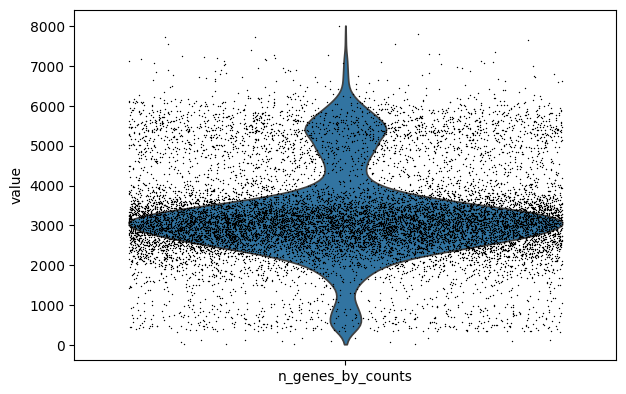

In [ ]:
#what is the average number of genes that have at least one detected identifier in each cell.
#in other words, the number of genes expressed in each cell

sc.pl.violin(
    fresh_blood_adata,
    ["n_genes_by_counts"],
    jitter=0.4,
    multi_panel=False,
)

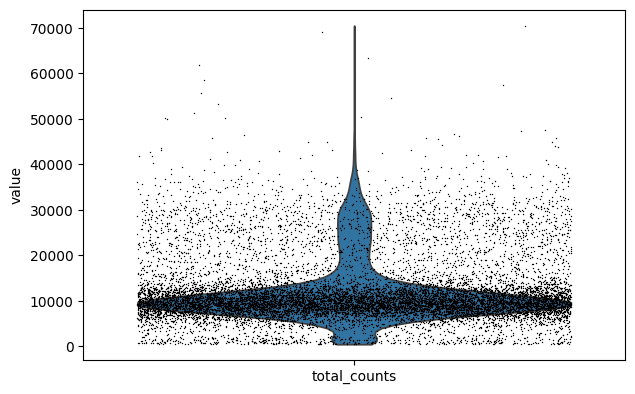

In [ ]:
#What is the total number of molecules (UMI) detected in a cell.
#basically you can have 10 UMI molecules but they are all pointing to the same gene.

sc.pl.violin(
    fresh_blood_adata,
    ["total_counts"],
    jitter=0.4,
    multi_panel=False,
)

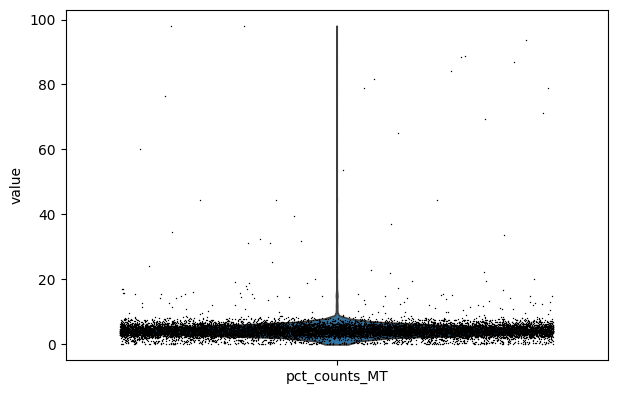

In [ ]:
#what about those mitochondrial genes?
sc.pl.violin(
    fresh_blood_adata,
    ["pct_counts_MT"],
    jitter=0.4,
    multi_panel=False,
)

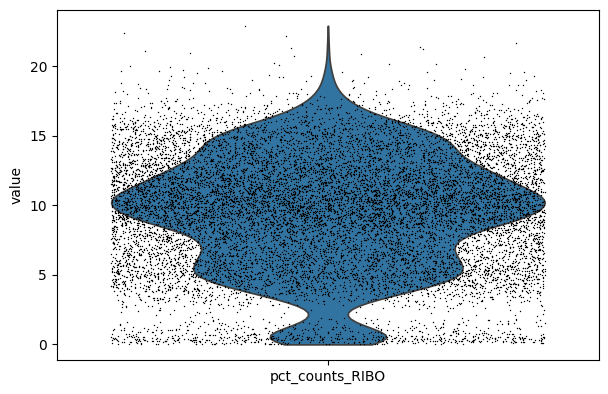

In [ ]:
#and the ribosomal genes
sc.pl.violin(
    fresh_blood_adata,
    ["pct_counts_RIBO"],
    jitter=0.4,
    multi_panel=False,
)

/usr/local/lib/python3.12/dist-packages/scanpy/plotting/_anndata.py:397: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  if key in adata.obs_keys():


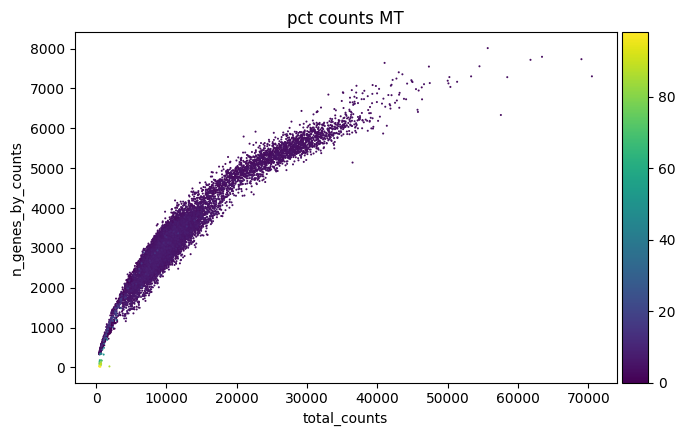

In [ ]:
#let's visualize the three of them. And let's see where the mitochondrial genes are
sc.pl.scatter(fresh_blood_adata, "total_counts", "n_genes_by_counts", color="pct_counts_MT")

/usr/local/lib/python3.12/dist-packages/scanpy/plotting/_anndata.py:397: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  if key in adata.obs_keys():


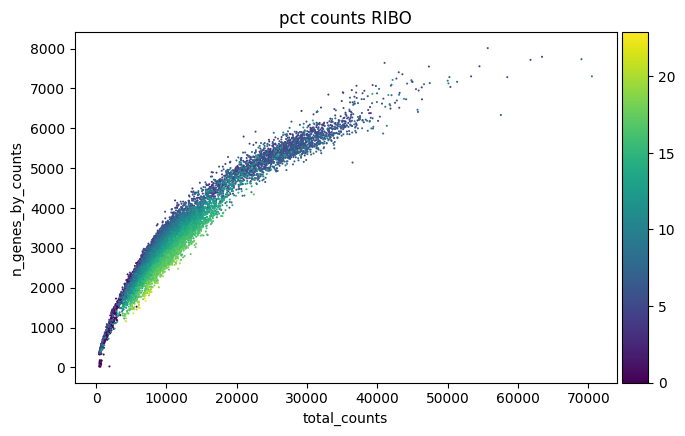

In [ ]:
sc.pl.scatter(fresh_blood_adata, "total_counts", "n_genes_by_counts", color="pct_counts_RIBO")

/usr/local/lib/python3.12/dist-packages/scanpy/plotting/_anndata.py:397: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  if key in adata.obs_keys():


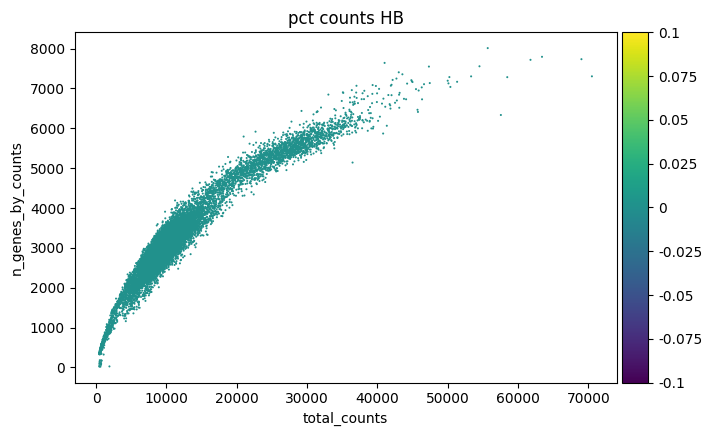

In [ ]:
sc.pl.scatter(fresh_blood_adata, "total_counts", "n_genes_by_counts", color="pct_counts_HB")

In [ ]:
"""
Additionally, it is important to note that for datasets with multiple batches,
quality control should be performed for each sample individually as quality
control thresholds can vary substantially between batches.
"""

'\nAdditionally, it is important to note that for datasets with multiple batches,\nquality control should be performed for each sample individually as quality\ncontrol thresholds can vary substantially between batches.\n'

In [ ]:
#Let's use the data MT plot to select things to remove
sc.pp.filter_cells(fresh_blood_adata, min_genes=1000)
sc.pp.filter_genes(fresh_blood_adata, min_cells=1000)

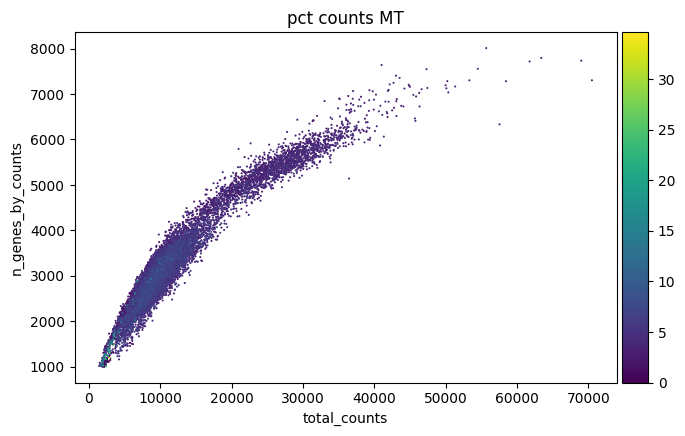

In [ ]:
sc.pl.scatter(fresh_blood_adata, "total_counts", "n_genes_by_counts", color="pct_counts_MT")

In [ ]:
# we can also further filter for ribosomal contaminations using

fresh_blood_adata = fresh_blood_adata[
    fresh_blood_adata.obs['pct_counts_RIBO'] < 10,
    :
]


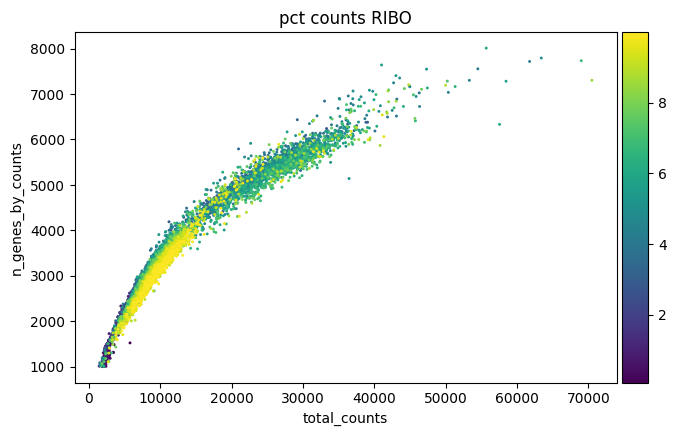

In [ ]:
sc.pl.scatter(fresh_blood_adata, "total_counts", "n_genes_by_counts", color="pct_counts_RIBO")

In [ ]:
#doublet detection
##Identifying doublets is crucial as they can lead to misclassifications or
##distortions in downstream analysis steps

In [ ]:
sc.pp.scrublet(fresh_blood_adata) #if you have multiple batch samples, you can specify it with batch_key="sample"

### ⚖️ Normalization
Normalization adjusts for sequencing depth differences between cells.
Here, we scale counts so each cell has the same total expression level.

In [ ]:
#Normalization

In [ ]:
# Save a copy of the data
fresh_blood_adata.layers["counts"] = fresh_blood_adata.X.copy()

In [ ]:
# Normalizing to median total counts
sc.pp.normalize_total(fresh_blood_adata)
# Logarithmize the data
sc.pp.log1p(fresh_blood_adata)

In [ ]:
#Feature selection
#selecting the top 1000 most variable genes
sc.pp.highly_variable_genes(fresh_blood_adata, n_top_genes=1000)

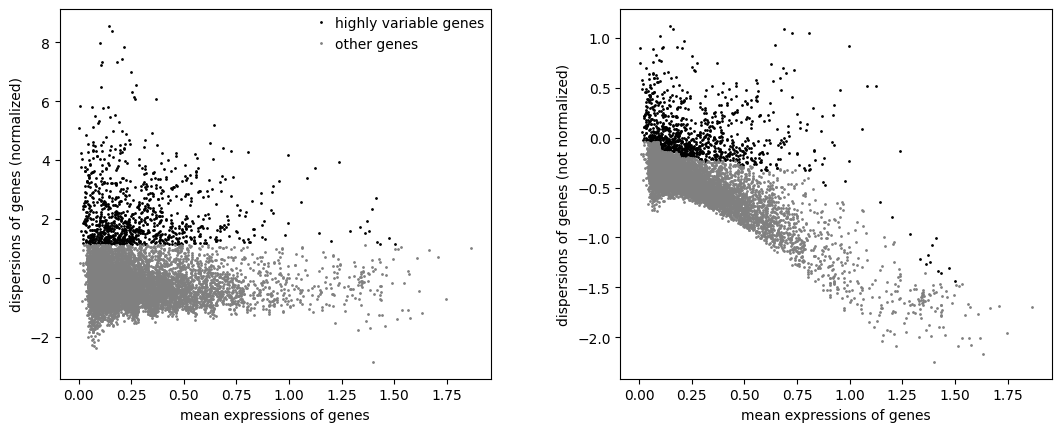

In [ ]:
sc.pl.highly_variable_genes(fresh_blood_adata )
#left is normalized
#right is not

### 🔍 Dimensionality Reduction (PCA)
We use **Principal Component Analysis (PCA)** to reduce data complexity and highlight key variation patterns.
This makes later steps like clustering and visualization faster and more robust.

In single-cell RNA-seq, each cell has expression values for thousands of genes, creating a huge, noisy matrix. PCA compresses this high-dimensional data into a smaller set of features (typically 30–50 components) that summarize the key biological and technical variation across cells.

- Noise reduction: scRNA-seq data are sparse and noisy. PCA focuses on the strongest correlated gene expression patterns, discarding random noise.

- Computational efficiency: Downstream analyses like clustering, UMAP, or t-SNE run much faster and more robustly on 30 PCs than on 20,000 genes.

- Signal extraction: The top PCs often correspond to meaningful biological structure—cell type, cell cycle state, or activation level—while later PCs capture less relevant variation.

In [ ]:
sc.tl.pca(fresh_blood_adata)

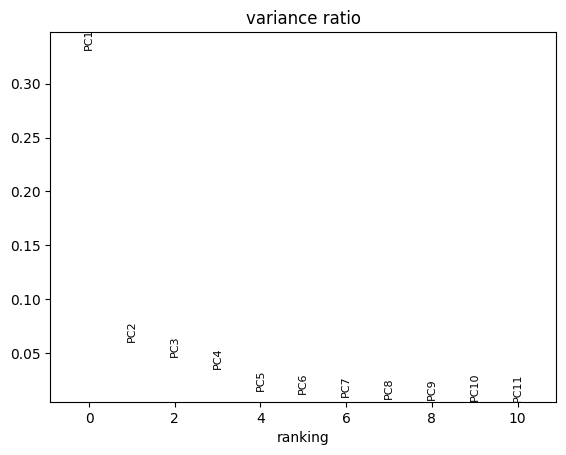

In [ ]:
sc.pl.pca_variance_ratio(fresh_blood_adata, n_pcs=10, log=False)

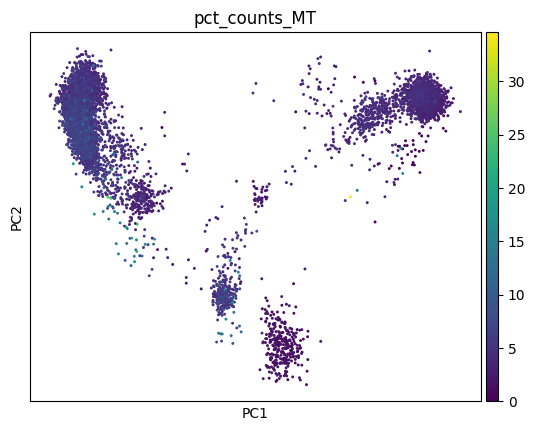

In [ ]:
sc.pl.pca(
    fresh_blood_adata,
    color=["pct_counts_MT"]
)

In [ ]:
## Nearest Neighbour
# Let us compute the neighborhood graph of cells using the PCA representation of the data matrix.
# basically we want to cluster the PCA components

In [ ]:
sc.pp.neighbors(fresh_blood_adata)

In [ ]:
sc.tl.umap(fresh_blood_adata)

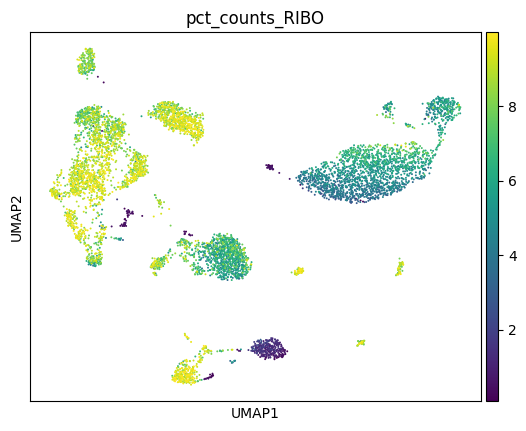

In [ ]:
sc.pl.umap(
    fresh_blood_adata,
    color=["pct_counts_RIBO"],
    size=8,
)

In [ ]:
## Clustering by communities.

##Clustering by communities in single-cell RNA-seq is the process of grouping cells that show similar expression profiles — essentially, discovering putative cell types or states.

## Once PCA compresses your data into a manageable set of dimensions, clustering algorithms like Leiden operate on a graph-based representation of cell–cell relationships.

## Usually used for cell type detection

In [ ]:
# Using the igraph implementation and a fixed number of iterations can be significantly faster, especially for larger datasets
sc.tl.leiden(fresh_blood_adata, flavor="igraph", n_iterations=2)

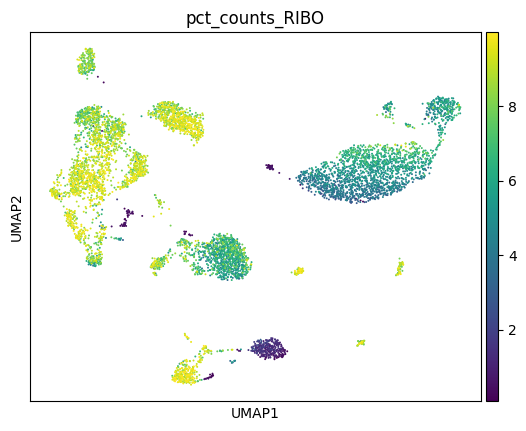

In [ ]:
sc.pl.umap(
    fresh_blood_adata,
    color=["pct_counts_RIBO"],
    size=8,
)

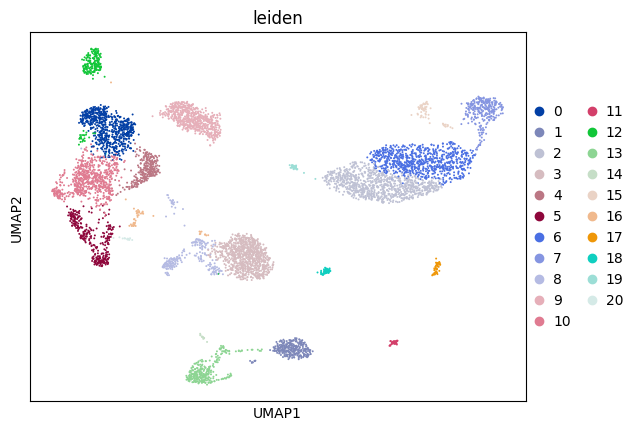

In [ ]:
sc.pl.umap(
    fresh_blood_adata,
    color=["leiden"],
    size=8,
)

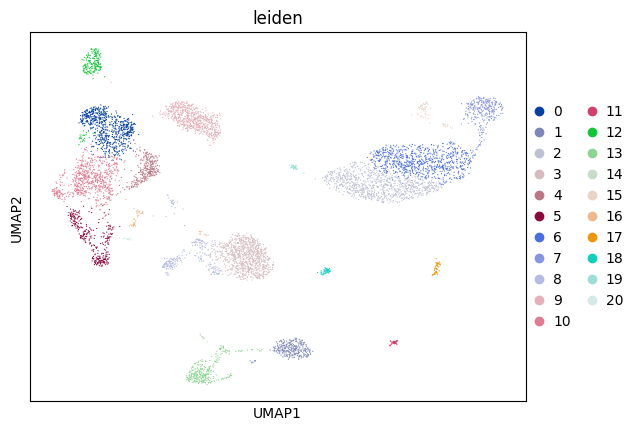

In [ ]:
sc.pl.umap(
    fresh_blood_adata,
    color=["leiden"],
    # increase horizontal space between panels
    wspace=0.5,
    size=3,
    ncols = 1
)

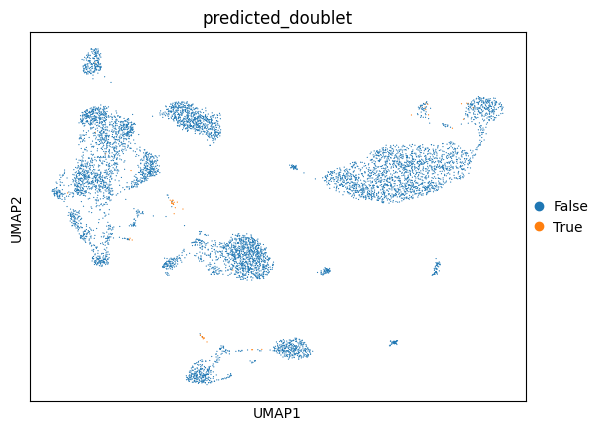

In [ ]:
sc.pl.umap(
    fresh_blood_adata,
    color=[ "predicted_doublet"],
    # increase horizontal space between panels
    wspace=0.5,
    size=3,
    ncols = 1
)

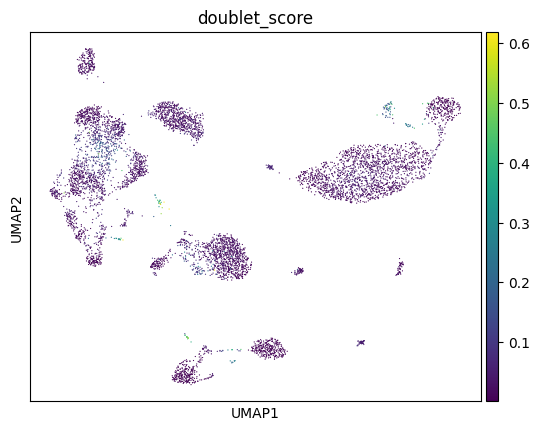

In [ ]:
sc.pl.umap(
    fresh_blood_adata,
    color=[ "doublet_score"],
    # increase horizontal space between panels
    wspace=0.5,
    size=3,
    ncols = 1
)

In [ ]:
#Further reclustering

In [ ]:
sc.tl.leiden(fresh_blood_adata, flavor="igraph", n_iterations=2, key_added="leiden_res0_02", resolution=0.02)
sc.tl.leiden(fresh_blood_adata, flavor="igraph", n_iterations=2, key_added="leiden_res0_5", resolution=0.5)
sc.tl.leiden(fresh_blood_adata, flavor="igraph", n_iterations=2, key_added="leiden_res2", resolution=2)

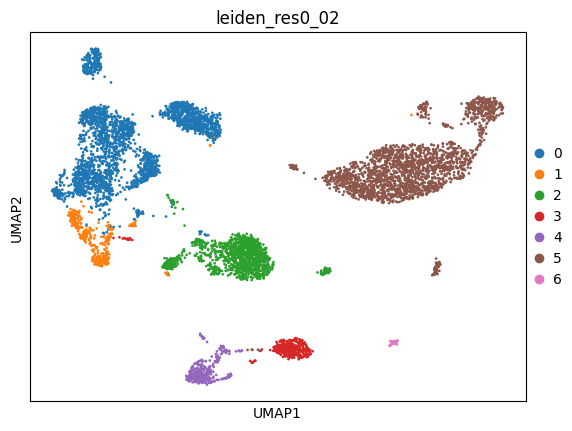

In [ ]:
sc.pl.umap(
    fresh_blood_adata,
    color=["leiden_res0_02"],
    # increase horizontal space between panels
    wspace=0.5,
    size=15,
    ncols = 1
)

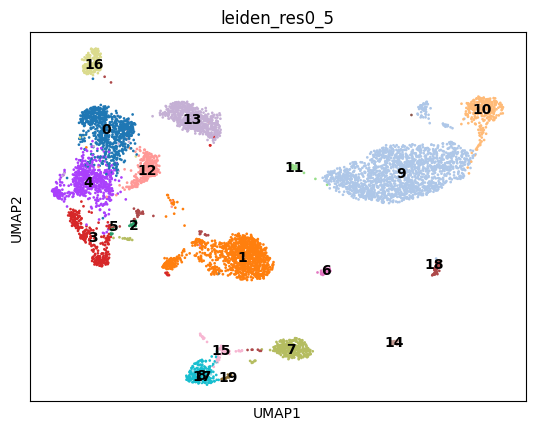

In [ ]:
sc.pl.umap(
    fresh_blood_adata,
    color=["leiden_res0_5"],
    # increase horizontal space between panels
    wspace=0.5,
    size=15,
    ncols = 1,
    legend_loc="on data"
)

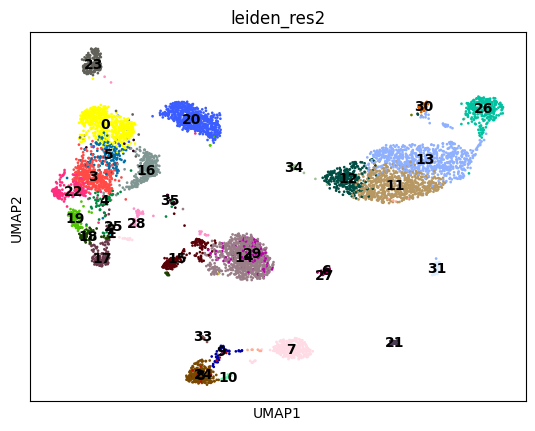

In [ ]:
sc.pl.umap(
    fresh_blood_adata,
    color=["leiden_res2"],
    # increase horizontal space between panels
    wspace=0.5,
    size=15,
    ncols = 1,
    legend_loc="on data"
)

### Cell Annotation
Cell annotation is the process of assigning biological meaning—like cell type or functional state—to each cluster found after Leiden clustering.

Traditionally, this relies on manual marker gene inspection: you identify top genes per cluster and match them to known markers. But tools like Decoupler enable a more systematic and data-driven approach.


Decoupler is a framework for gene set activity inference. Instead of labeling clusters by single markers, it estimates the activity of predefined pathways, transcription factors, or cell-type signatures from known databases (e.g., MSigDB, PROGENy, DoRothEA).

In practice:

- You provide your normalized expression matrix (adata).

- You load gene sets representing known biological programs or cell-type signatures.

- Decoupler calculates an activity score per cell or cluster using methods like weighted mean, ULM, or AUCell.

- You interpret those activities to annotate clusters automatically or semi-automatically.

In [ ]:
import decoupler as dc

In [ ]:
# Query Omnipath and get PanglaoDB
markers = dc.op.resource(name="PanglaoDB", organism="human")

# Keep canonical cell type markers alone
markers = markers[markers["canonical_marker"]]

# Remove duplicated entries
markers = markers[~markers.duplicated(["cell_type", "genesymbol"])]

# Format because dc only accepts cell_type and genesymbol

markers = markers.rename(columns={"cell_type": "source", "genesymbol": "target"})
markers = markers[["source", "target"]]


markers.head()

,source,target
,,
2,Bergmann glia,A2M
4,Mast cells,A4GALT
5,Embryonic stem cells,A7KBS4
8,Pinealocytes,AANAT
9,Astrocytes,AANAT


In [ ]:
#load the gene expression matrix into dc

dc.mt.ulm(data=fresh_blood_adata,
          net=markers,
          tmin = 3)

In [ ]:
#retrieve the score for each cell type

score = dc.pp.get_obsm(fresh_blood_adata, key="score_ulm")
score

AnnData object with n_obs × n_vars = 13439 × 97
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'total_counts_RIBO', 'log1p_total_counts_RIBO', 'pct_counts_RIBO', 'total_counts_HB', 'log1p_total_counts_HB', 'pct_counts_HB', 'n_genes', 'doublet_score', 'predicted_doublet', 'leiden', 'leiden_res0_02', 'leiden_res0_5', 'leiden_res2'
    uns: 'scrublet', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'predicted_doublet_colors', 'leiden_res0_02', 'leiden_res0_5', 'leiden_res2', 'leiden_res0_02_colors', 'leiden_res0_5_colors', 'leiden_res2_colors'
    obsm: 'X_pca', 'X_umap', 'score_ulm', 'padj_ulm'

In [ ]:
#preview the data
fresh_blood_adata.obsm["score_ulm"].head()

,Acinar cells,Adipocytes,Alpha cells,Alveolar macrophages,Astrocytes,B cells,B cells memory,B cells naive,Basophils,Bergmann glia,...,Sebocytes,Sertoli cells,Smooth muscle cells,T cells,T follicular helper cells,T helper cells,T regulatory cells,Tanycytes,Thymocytes,Tuft cells
AAACCAAAGAACAGAC-1,-1.024520,-1.157857,-1.122553,3.167727,1.788504,0.051880,-1.991232,-1.919460,0.996606,2.561394,...,-0.970895,-0.943990,0.159336,11.967801,-0.348311,3.556622,-0.233372,-1.024520,3.257220,2.539718
AAACCAAAGCAAGATA-1,-0.851239,-1.066545,1.392907,-0.160084,1.674194,1.649956,-0.657855,0.215860,0.280422,-0.392360,...,-1.204066,-1.446825,-1.446825,6.544548,-0.851239,1.153128,-0.715220,-0.160084,1.384593,1.146025
AAACCAAAGCTGGTTA-1,-0.972659,-0.605491,1.733040,1.533731,1.245965,1.393795,-1.627565,-0.710262,-0.071197,0.367371,...,-0.641492,0.093290,-1.218025,11.277543,-0.972659,1.850920,-1.375830,0.065565,1.963522,2.093752
AAACCAGCACCTAACG-1,-0.975911,-2.175951,1.169892,1.881583,2.208534,-0.181091,-2.086519,-1.618377,1.766395,2.600667,...,0.863481,-2.325356,-0.313729,9.256290,-0.975911,3.394022,-1.380429,-0.975911,2.632058,3.212239
AAACCAGCACGCGTTA-1,-0.365460,-1.407562,1.452857,1.975010,1.530813,1.212177,-0.524691,-0.725068,-0.173370,1.918253,...,0.613889,-1.642448,-1.796702,11.714664,-0.365460,2.828105,-1.366579,-0.365460,3.798206,1.923412


In [ ]:
fresh_blood_adata.obsm["score_ulm"].columns

Index(['Acinar cells', 'Adipocytes', 'Alpha cells', 'Alveolar macrophages',
       'Astrocytes', 'B cells', 'B cells memory', 'B cells naive', 'Basophils',
       'Bergmann glia', 'Beta cells', 'Cardiomyocytes', 'Cholangiocytes',
       'Chondrocytes', 'Chromaffin cells', 'Clara cells', 'Crypt cells',
       'Delta cells', 'Dendritic cells', 'Ductal cells',
       'Embryonic stem cells', 'Endothelial cells', 'Enterocytes',
       'Enteroendocrine cells', 'Eosinophils', 'Ependymal cells',
       'Epsilon cells', 'Erythroblasts',
       'Erythroid-like and erythroid precursor cells', 'Fibroblasts',
       'Gamma (PP) cells', 'Gamma delta T cells', 'Gastric chief cells',
       'Germ cells', 'Glomus cells', 'Hematopoietic stem cells', 'Hepatocytes',
       'Immature neurons', 'Intercalated cells', 'Keratinocytes',
       'Kupffer cells', 'Langerhans cells', 'Leydig cells',
       'Loop of Henle cells', 'Luminal epithelial cells', 'Macrophages',
       'Mammary epithelial cells', 'Mast cel

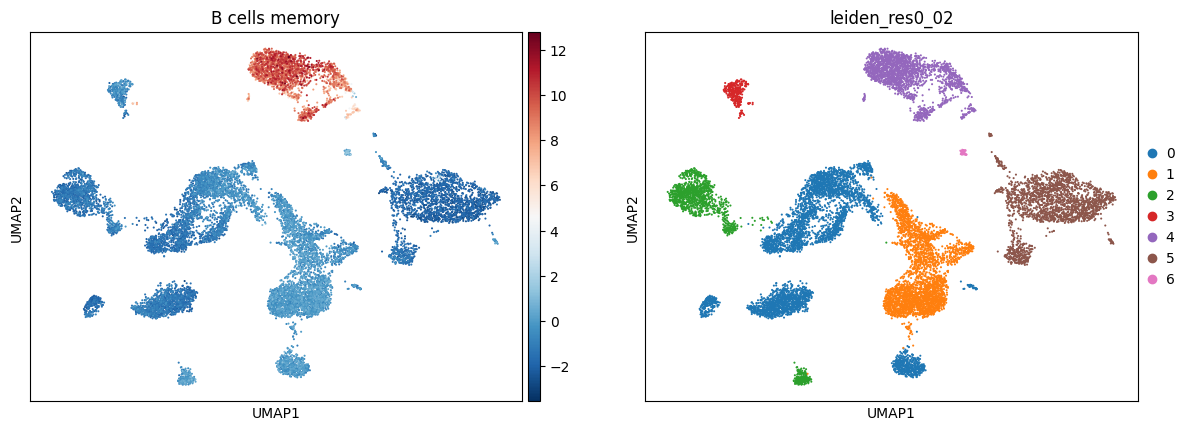

In [ ]:
sc.pl.umap(score, color=["B cells memory", "leiden_res0_02"], cmap="RdBu_r")

In [ ]:
import seaborn as sns

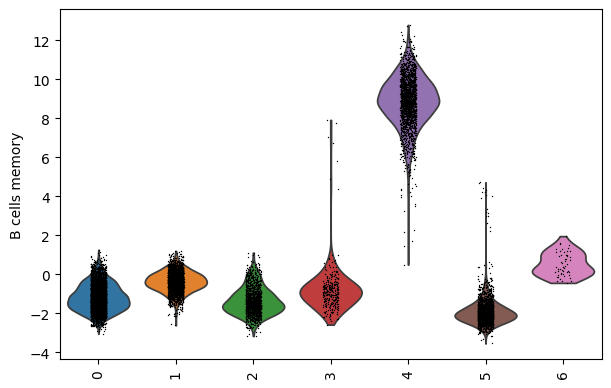

In [ ]:
sc.pl.violin(score, keys=["B cells memory"], groupby="leiden_res0_02", rotation=90)

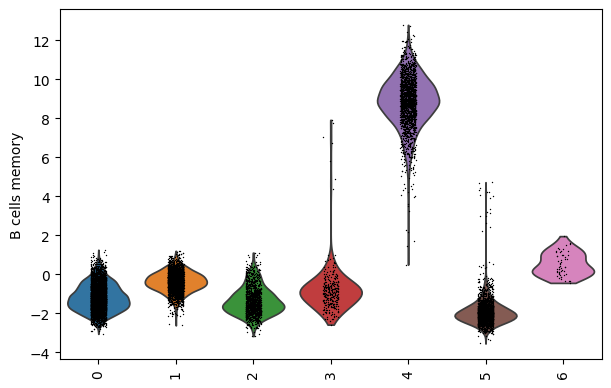

In [ ]:
sc.pl.violin(score, keys=["B cells memory"], groupby="leiden_res0_02", rotation=90)

In [ ]:
#. Now let's know what each of the 7 clusters mean

In [ ]:
#rank genes
fresh_blood_adata_rank = dc.tl.rankby_group(score, groupby="leiden_res0_02", reference="rest", method="t-test_overestim_var")
fresh_blood_adata_rank = fresh_blood_adata_rank[fresh_blood_adata_rank["stat"] > 0]
fresh_blood_adata_rank.head()

,group,reference,name,stat,meanchange,pval,padj
0,0,rest,T cells,87.319301,6.030998,0.0,0.0
1,0,rest,NK cells,76.073701,6.432556,0.0,0.0
2,0,rest,Gamma delta T cells,62.249197,5.416916,0.0,0.0
3,0,rest,Thymocytes,60.394609,1.450974,0.0,0.0
4,0,rest,Natural killer T cells,39.891940,1.380208,0.0,0.0


In [ ]:
cluster_annotations = fresh_blood_adata_rank[fresh_blood_adata_rank["stat"] > 0].groupby("group").head(1).set_index("group")["name"].to_dict()

In [ ]:
cluster_annotations

{'0': 'T cells',
 '1': 'Nuocytes',
 '2': 'Natural killer T cells',
 '3': 'Mast cells',
 '4': 'B cells memory',
 '5': 'Macrophages',
 '6': 'Plasmacytoid dendritic cells'}

In [ ]:
fresh_blood_adata.obs['cell_type'] = fresh_blood_adata.obs['leiden_res0_02'].map(cluster_annotations)


In [ ]:
# Example of how to subset for multiple genes in the 'source' column
available_genes = set(fresh_blood_adata.var_names)

b_cell_markers = markers[markers['source'].isin(['B cells memory'])]['target']
b_cell_markers = b_cell_markers[b_cell_markers.isin(available_genes)]

nk_cell_markers = markers[markers['source'].isin(['Natural killer T cells'])]['target']
nk_cell_markers = nk_cell_markers[nk_cell_markers.isin(available_genes)]

t_cells_markers = markers[markers['source'].isin(['T cells'])]['target']
t_cells_markers = t_cells_markers[t_cells_markers.isin(available_genes)]


#display(b_cell_markers)

### Other ways to visualize the cell types

In [ ]:
marker_genes_dict = {
    "B cells": b_cell_markers.head().tolist(),
    "NK cells": nk_cell_markers.head().tolist(),
    "T cells": t_cells_markers.head().tolist()
}

categories: T cells, Nuocytes, Natural killer T cells, etc.
var_group_labels: B cells, NK cells, T cells


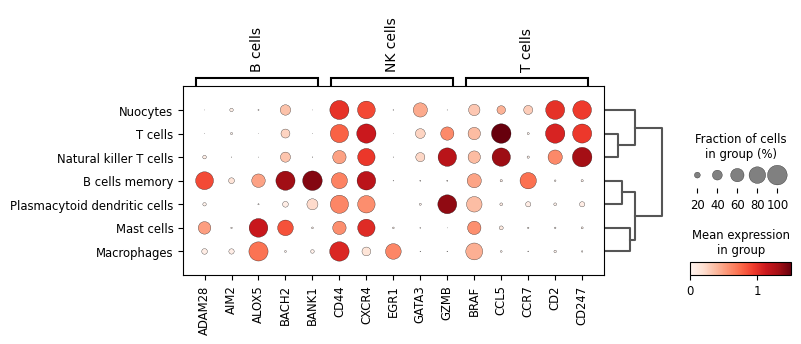

In [ ]:
sc.pl.dotplot(fresh_blood_adata, marker_genes_dict, "cell_type", dendrogram=True)

categories: 0, 1, 2, etc.
var_group_labels: B cells, NK cells, T cells


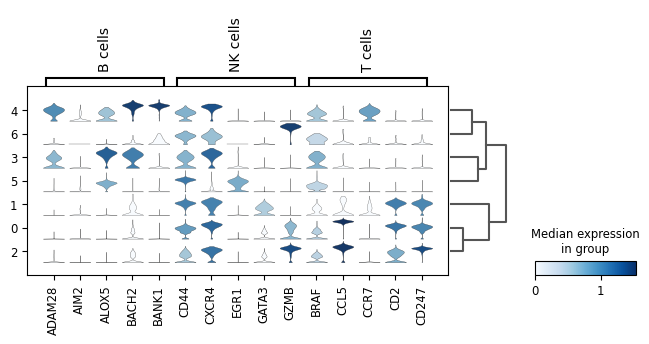

In [ ]:
sc.pl.stacked_violin(
    fresh_blood_adata, marker_genes_dict, groupby="leiden_res0_02",  dendrogram=True
)

categories: 0, 1, 2, etc.
var_group_labels: B cells, NK cells, T cells


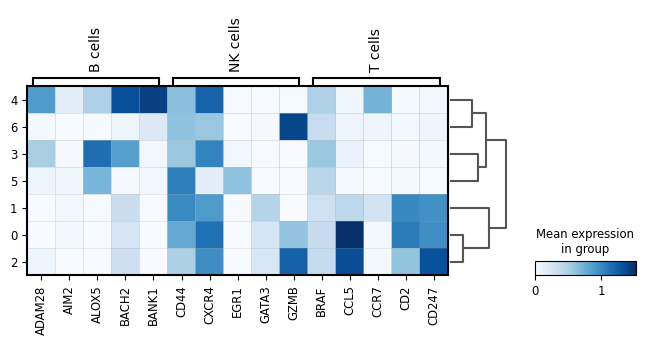

In [ ]:
sc.pl.matrixplot(
    fresh_blood_adata,
    marker_genes_dict,
    "leiden_res0_02",
    dendrogram=True,
    cmap="Blues",
)

categories: 0, 1, 2, etc.
var_group_labels: B cells, NK cells, T cells


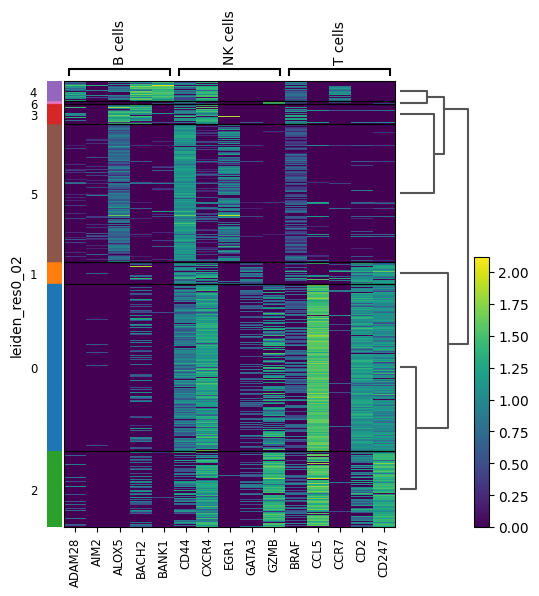

In [ ]:
sc.pl.heatmap(
    fresh_blood_adata, marker_genes_dict, groupby="leiden_res0_02", cmap="viridis", dendrogram=True
)

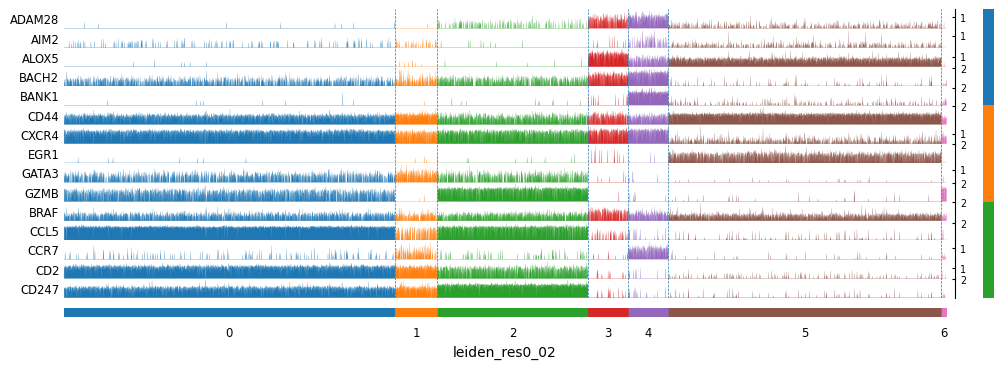

In [ ]:
# @title Using genome tracks
sc.pl.tracksplot(fresh_blood_adata, marker_genes_dict, groupby="leiden_res0_02", dendrogram=False)